In [1]:
import os
import csv
import matplotlib.pyplot as plt  # plotting
import numpy as np  # numerics
from skimage import io
from natsort import natsorted
#import skimage.io
import skimage.color
import skimage.morphology
import skimage.measure as sm

from skimage.io import imread
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from skimage import (io, filters,  morphology, measure, segmentation, feature, util, exposure)
from scipy.ndimage import gaussian_filter 
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom


In [2]:
#define two folder paths - for September 2023 and October 2023 
folder_path_september = './HoloMonitor Beta TIFF/September 2023/MDCK Edna_06.09.23-B1-1_100ul'
folder_path_october = './HoloMonitor Beta TIFF/October 2023/MDCK 17.10.23/B2-1'


In [3]:
list_files_september = [os.path.join(folder_path_september, f) for f in os.listdir(folder_path_september)]
list_files_september = natsorted(list_files_september)
image_list_september = []

#open all images in the stack
for filename in list_files_september:
    image_list_september.append(io.imread(filename))
    

In [4]:
list_files_october = [os.path.join(folder_path_october, f) for f in os.listdir(folder_path_october)]
list_files_october = natsorted(list_files_october)
image_list_october = []

#open all images in the stack
for filename in list_files_october:
    image_list_october.append(io.imread(filename))
    

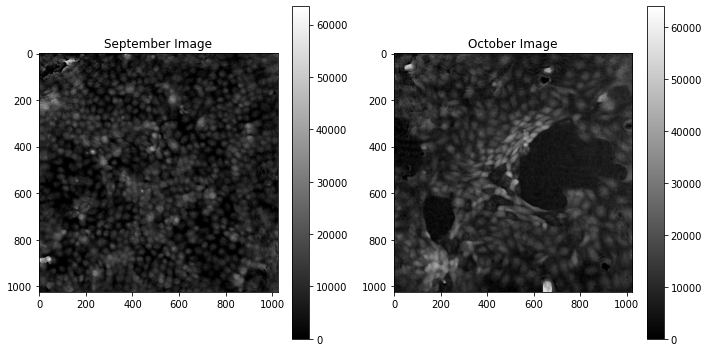

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

im1 = ax[0].imshow(image_list_september[0], cmap='gray')
cbar1 = fig.colorbar(im1, ax=ax[0])
ax[0].set_title('September Image')

im2 = ax[1].imshow(image_list_october[0], cmap='gray')
cbar2 = fig.colorbar(im2, ax=ax[1])
ax[1].set_title('October Image')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()


In [6]:
csv_file_path_september = 'September_2023_MDCK_Edna_06.09.23-B1-1_100ul_minmaxvalues_rawHM.csv'
csv_file_path_october = 'MDCK_17.10.23_B2-1_minmaxvalues_rawHM.csv' 

In [7]:
min_values_september = []
max_values_september = []

# Read the CSV file
with open(csv_file_path_september, 'r') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)
    
    # Skip the header row if it exists
    header = next(csv_reader, None)
    
    # Iterate through the rows and extract data
    for row in csv_reader:
        min_values_september.append(float(row[0]))
        max_values_september.append(float(row[1]))
        
min_values_september = np.array(min_values_september)
max_values_september = np.array(max_values_september)

In [8]:
min_values_september = min_values_september * 15.875

In [9]:
max_values_september = max_values_september * 15.875

In [10]:
min_values_october = []
max_values_october = []

# Read the CSV file
with open(csv_file_path_october, 'r') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)
    
    # Skip the header row if it exists
    header = next(csv_reader, None)
    
    # Iterate through the rows and extract data
    for row in csv_reader:
        min_values_october.append(float(row[0]))
        max_values_october.append(float(row[1]))
        
min_values_october = np.array(min_values_october)
max_values_october= np.array(max_values_october)

In [11]:
min_values_october = min_values_october * 15.875

In [12]:
max_values_october = max_values_october * 15.875

In [13]:
print(min_values_september)

[ -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000076  -2.00000076  -2.00000076  -2.00000076  -2.00000076
  -2.00000

In [14]:
print(max_values_september)

[16.73124987 15.69792072 28.331287   32.0384805  19.34970413 22.19652025
 20.791424   26.3518015  19.8637525  17.36590062 19.64815412 25.52088812
 18.37047062 25.498679   22.98917487 17.39844438 17.59361163 18.49023162
 20.9790665  20.704937   27.59749688 18.420969   23.67003775 17.19641913
 26.75872538 20.11100563 20.58960512 23.78452825 20.997037   21.06791888
 23.36191987 19.06025525 21.93736087 20.816443   20.22884575 18.80341362
 18.64031388 18.17036625 17.658842   17.27677837 20.39881937 19.3295905
 20.670139   18.66596788 16.136493   16.39115975 23.81826262 17.498568
 18.65577613 19.65829825 18.28595213 18.5119645  24.36299738 26.19341663
 18.08605413 17.24836212 20.13632625 15.252065   15.37397389 15.01873107
 15.04402313 20.7037305  22.631019   21.9685235  18.78036312 19.19670088
 17.80973387 25.92976462 21.500211   28.45077813 21.55448763 24.41355925
 22.47549163 20.65772475 20.02424875 20.97452625 23.92351388 19.06058862
 18.21308588 18.8863605  31.2004075   2.39336262 20.62

In [15]:
print(min_values_october)

[-2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2.00000076
 -2.00000076 -2.00000076 -2.00000076 -2.00000076 -2

In [16]:
print(max_values_october)

[17.3534705  18.0310155  13.64892495 11.20758014 11.43316389 14.7825587
 20.3838175  23.06234275 27.49357913 28.0336625  24.37914225 26.428192
 13.59163684 24.02251037 24.8012585  23.72636225 26.0811645  24.24676063
 27.71128887 13.43297415 13.9988671  13.99421414 27.32054163 16.35015462
 15.29913914 14.9961473  20.005929   17.85248525 14.75886367 15.32327708
 25.232487   15.54916721 19.36149925 14.29216408 15.20472099 14.44517526
 26.41388862 23.79437075 25.95668863 23.26470137 25.76833175 14.11925516
 18.20465625 15.56393731 15.902559   15.2308433  16.10917213 15.62365589
 18.13301237 15.1897969  19.25564475 18.91725325 16.92340087 18.2679975
 15.8438469  16.15898788 13.78601034 17.16797113 15.95283513 14.1567154
 16.54395662 22.90498975 23.4099735  26.44862313 27.62819912 15.09645507
 31.94156363 14.93339025 18.900648   15.28693444 15.91891025 15.02256171
 13.88164927 28.47743225 28.15580475 13.6194038  27.12597763 14.08571446
 13.936345   29.15153237 12.41878549 24.53330438 23.2007

In [17]:
delta_I = 65535
zeta_min_september = np.min(min_values_september)
delta_zeta_i_september = max_values_september - min_values_september

I_hat_0_september = ( (image_list_september[0]/delta_I) * delta_zeta_i_september[0] + zeta_min_september - min_values_september[0] ) #*1000 #scaled to nanometers for the first image in the stack


In [22]:
print(I_hat_0_september)

[[-29.14965673 -28.341642   -27.23980373 ... -25.69723015 -24.9626713
  -23.42009772]
 [-29.8107597  -29.07620085 -27.53362727 ... -24.88921541 -24.52193599
  -23.64046537]
 [-29.88421558 -29.59039204 -28.56200966 ... -24.37502422 -24.37502422
  -24.22811245]
 ...
 [-29.22311262 -29.22311262 -29.22311262 ... -26.28487723 -26.50524488
  -26.50524488]
 [-29.22311262 -29.2965685  -29.37002439 ... -26.06450957 -25.9175978
  -25.77068603]
 [-29.00274496 -29.14965673 -29.2965685  ... -25.99105369 -25.55031838
  -25.03612718]]


In [19]:
delta_I = 65535
zeta_min_october = np.min(min_values_october)
delta_zeta_i_october = max_values_october - min_values_october

I_hat_0_october = ( (image_list_october[0]/delta_I) * delta_zeta_i_october[0] + zeta_min_october - min_values_october[0] ) #*1000 #scaled to nanometers for the first image in the stack


In [20]:
print(I_hat_0_october)

[[3.33942249 3.33942249 3.26352653 ... 5.3127176  5.00913374 4.47786198]
 [3.33942249 3.26352653 3.1117346  ... 5.5404055  5.16092567 4.62965391]
 [3.33942249 3.1117346  2.80815073 ... 5.0850297  4.78144584 4.47786198]
 ...
 [1.59381528 1.51791931 1.66971125 ... 1.97329511 2.20098301 2.6563588 ]
 [1.59381528 1.36612738 1.51791931 ... 1.66971125 1.89739914 2.35277494]
 [1.59381528 1.13843949 1.21433545 ... 1.44202335 1.59381528 2.04919107]]


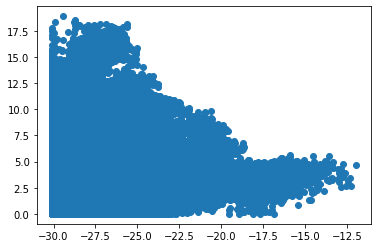

In [24]:
plt.scatter(I_hat_0_september, I_hat_0_october)